Marketing Campaign for Banking Products



Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

Context:
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

Attribute Information:
● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer 

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 
   3: Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?


Objective:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.bold text

# **Task: 1**

**Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
Dataset = pd.read_excel('Bank loan.xlsx',sheet_name='Data')

In [ ]:
#to display the top 5 rows
Dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#to display the bottom 5 rows
Dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#to display the dataset of each column and also display the non-null rows for each column
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#to display the Summary stats which includes count , mean , std,min,max,etc
Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
Dataset.shape()

TypeError: ignored

Observation

No Missing Values

In [ ]:
Dataset.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [ ]:
# To display how many nulls value are present in each column
Dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **Task: 2**

**Check if you need to clean the data for any of the variables**


Observation

    Column 'Experience' has negative values

Replacing the negative values with the medium value of the column.

**checking wheather there is any negative in it .**

In [ ]:
any(Dataset['Experience'] < 0)

True

**Changing the negative Value into median value**

In [ ]:
exp_med = Dataset.loc[:,"Experience"].median()
Dataset.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

**Checking in the table** 

In [ ]:
Dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
Dataset[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366891,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052030,-0.012539
Income,0.502462,-0.055269,1.000000,0.645993,0.206806
CCAvg,0.366891,-0.052030,0.645993,1.000000,0.109909
Mortgage,0.142095,-0.012539,0.206806,0.109909,1.000000


In [ ]:
experience = Dataset['Experience']
age = Dataset['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

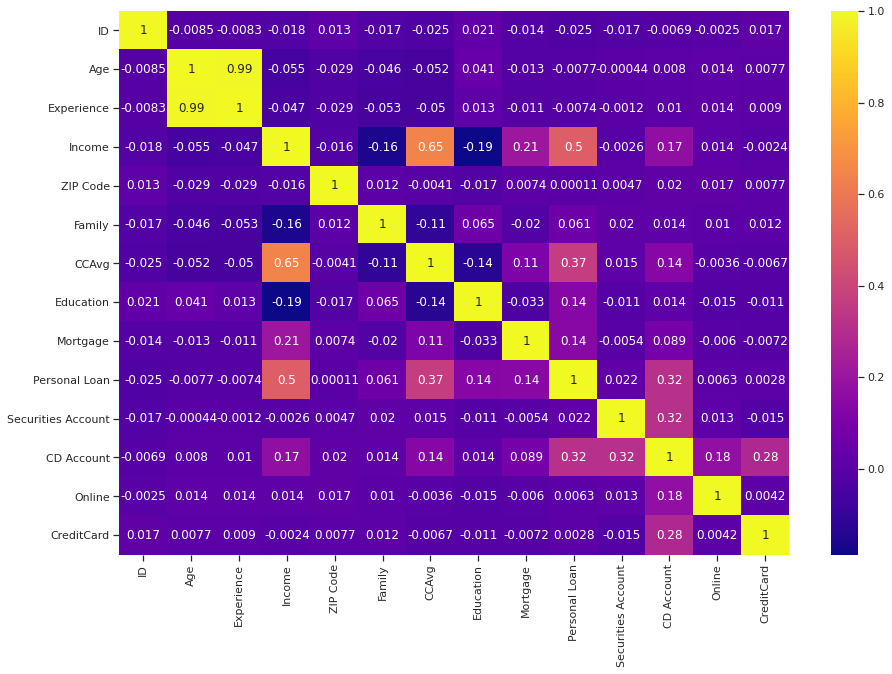

In [ ]:
Dataset.ax = plt.subplots(figsize=(15,10))
sns.heatmap(Dataset.corr(),cmap='plasma' ,annot = True)

In [ ]:
Dataset.info

<bound method DataFrame.info of       Age  Income  ZIP Code  ...  CD Account  Online  CreditCard
0      25      49     91107  ...           0       0           0
1      45      34     90089  ...           0       0           0
2      39      11     94720  ...           0       0           0
3      35     100     94112  ...           0       0           0
4      35      45     91330  ...           0       0           1
...   ...     ...       ...  ...         ...     ...         ...
4995   29      40     92697  ...           0       1           0
4996   30      15     92037  ...           0       1           0
4997   63      24     93023  ...           0       0           0
4998   65      49     90034  ...           0       1           0
4999   28      83     92612  ...           0       1           1

[5000 rows x 12 columns]>

In [ ]:
Dataset = Dataset.drop(['ID','ZIP Code'],axis=1)
Dataset.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


# **Task: 3**

**EDA: Study the data distribution in each attribute and target variable, share your
findings.**

● Number of unique in each column

In [ ]:
Dataset.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

● Number of people with zero mortgage

In [ ]:
(Dataset.Mortgage == 0).sum()

3462

● Number of people with zero credit card spending per month

In [ ]:
(Dataset.CCAvg == 0).sum()

106

● Value counts of all categorical columns.

In [ ]:
Dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

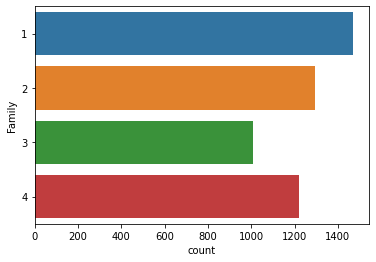

In [ ]:
sns.countplot(y='Family', data=Dataset)

● Univariate and Bivariate analysis

**Univariate Analysis of the continuous variables before Skewness**

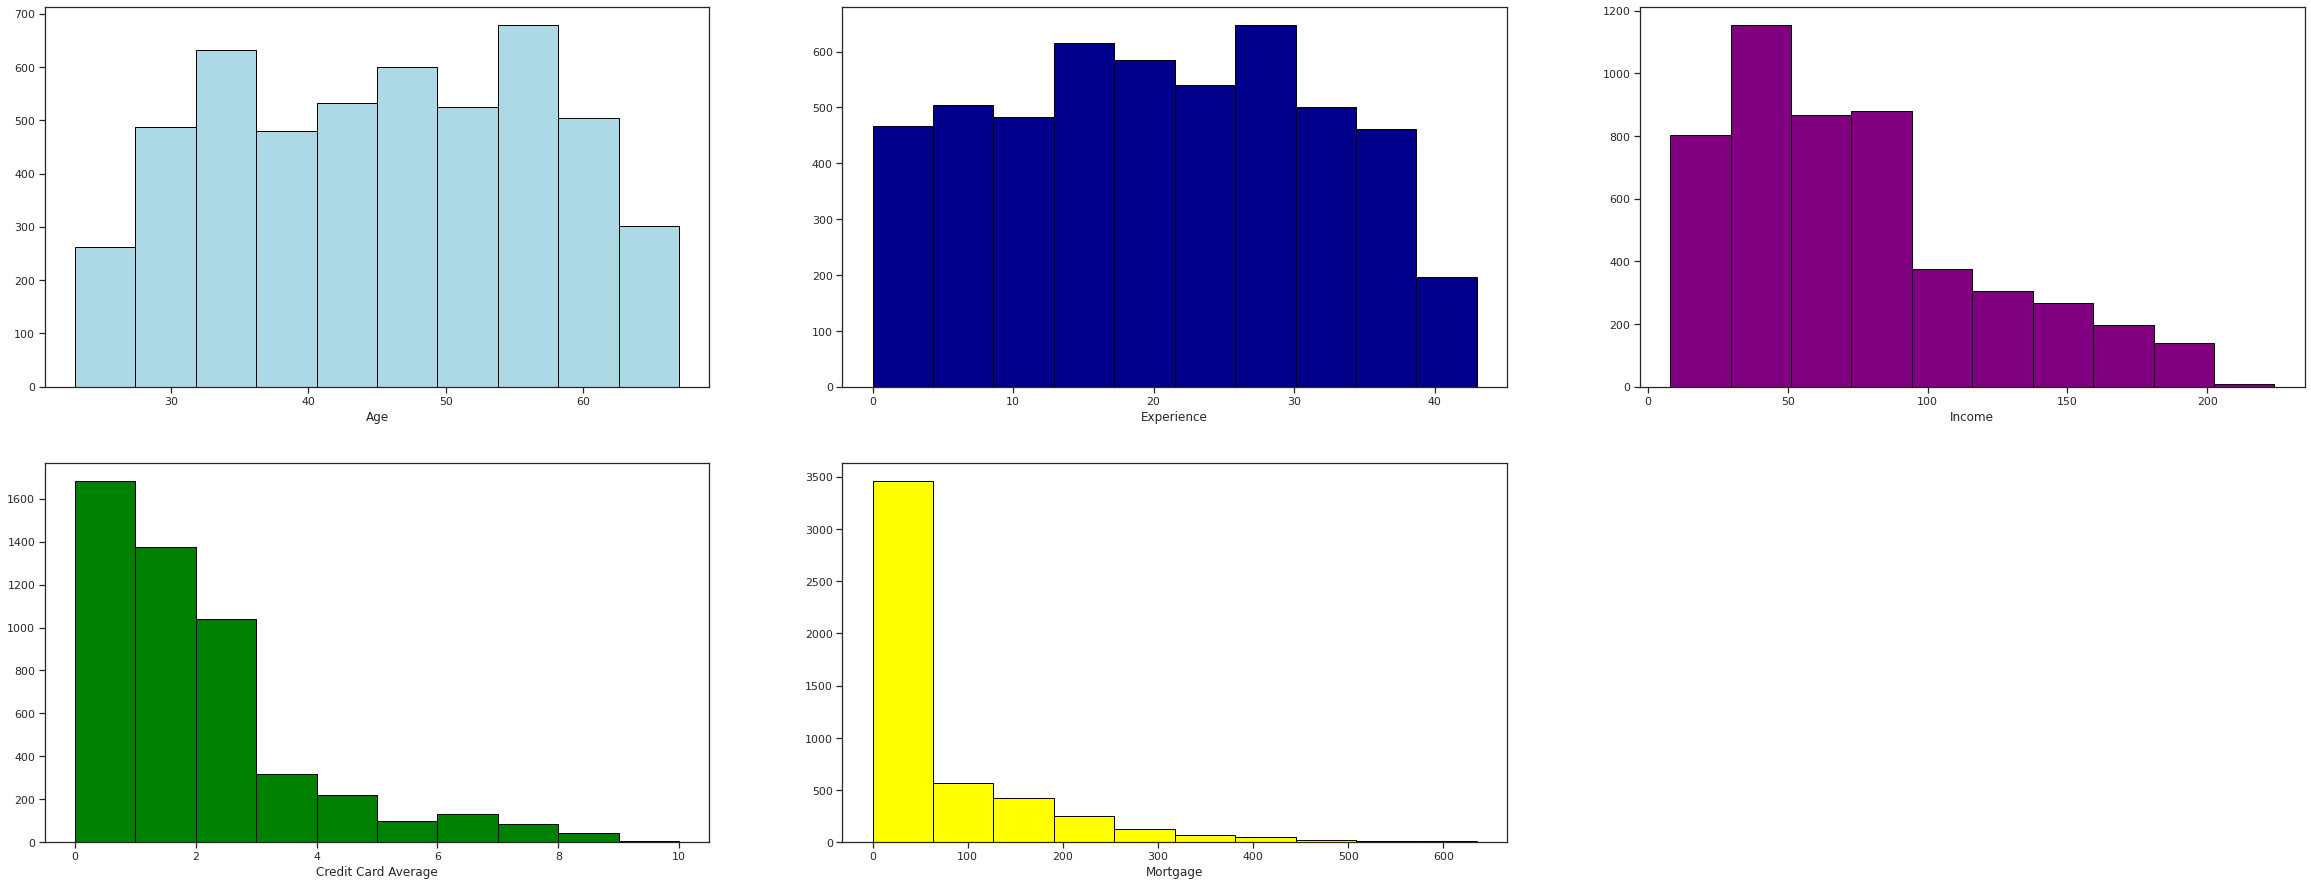

In [ ]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(Dataset.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(Dataset.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(Dataset.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(Dataset.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(Dataset.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

Observation
 
Checking for Skewness of data

In [ ]:
# Checking for Skewness of data

import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(Dataset.Mortgage),stats.skew(Dataset.Income),stats.skew(Dataset.CCAvg),stats.skew(Dataset.Experience)
                                      ,stats.skew(Dataset.Age)]},index=['Mortgage','Income','CCAvg','Experience','Age'])
Skewness

,Skewness
Mortgage,2.103371
Income,0.841086
CCAvg,1.597977
Experience,-0.014096
Age,-0.029332


Observation

Income, Credit card Average & Mortgage are highly skewed


**Univariate Analysis of the continuous variables for the specified variable which has high skewness**

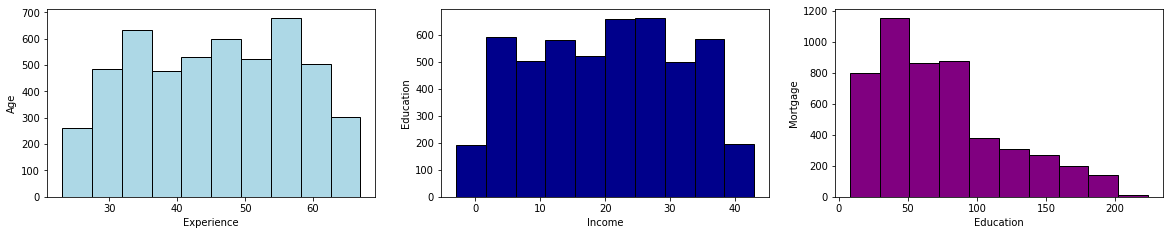

In [ ]:
plt.figure(figsize= (20,20))
plt.subplot(5,3,1)
plt.hist(Dataset.Age, color='lightblue', edgecolor = 'black')
plt.ylabel('Age')
plt.xlabel('Experience')

plt.subplot(5,3,2)
plt.hist(Dataset.Experience, color='darkblue', edgecolor = 'black')
plt.ylabel('Education')
plt.xlabel('Income')

plt.subplot(5,3,3)
plt.hist(Dataset.Income, color='purple', edgecolor = 'black')
plt.ylabel('Mortgage')
plt.xlabel('Education')


plt.show()

Multivariate Analysis: Pair plot:

pair plot shows a clear and nice view of all variables and their realtion ship with all other variables. Image for post


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have var

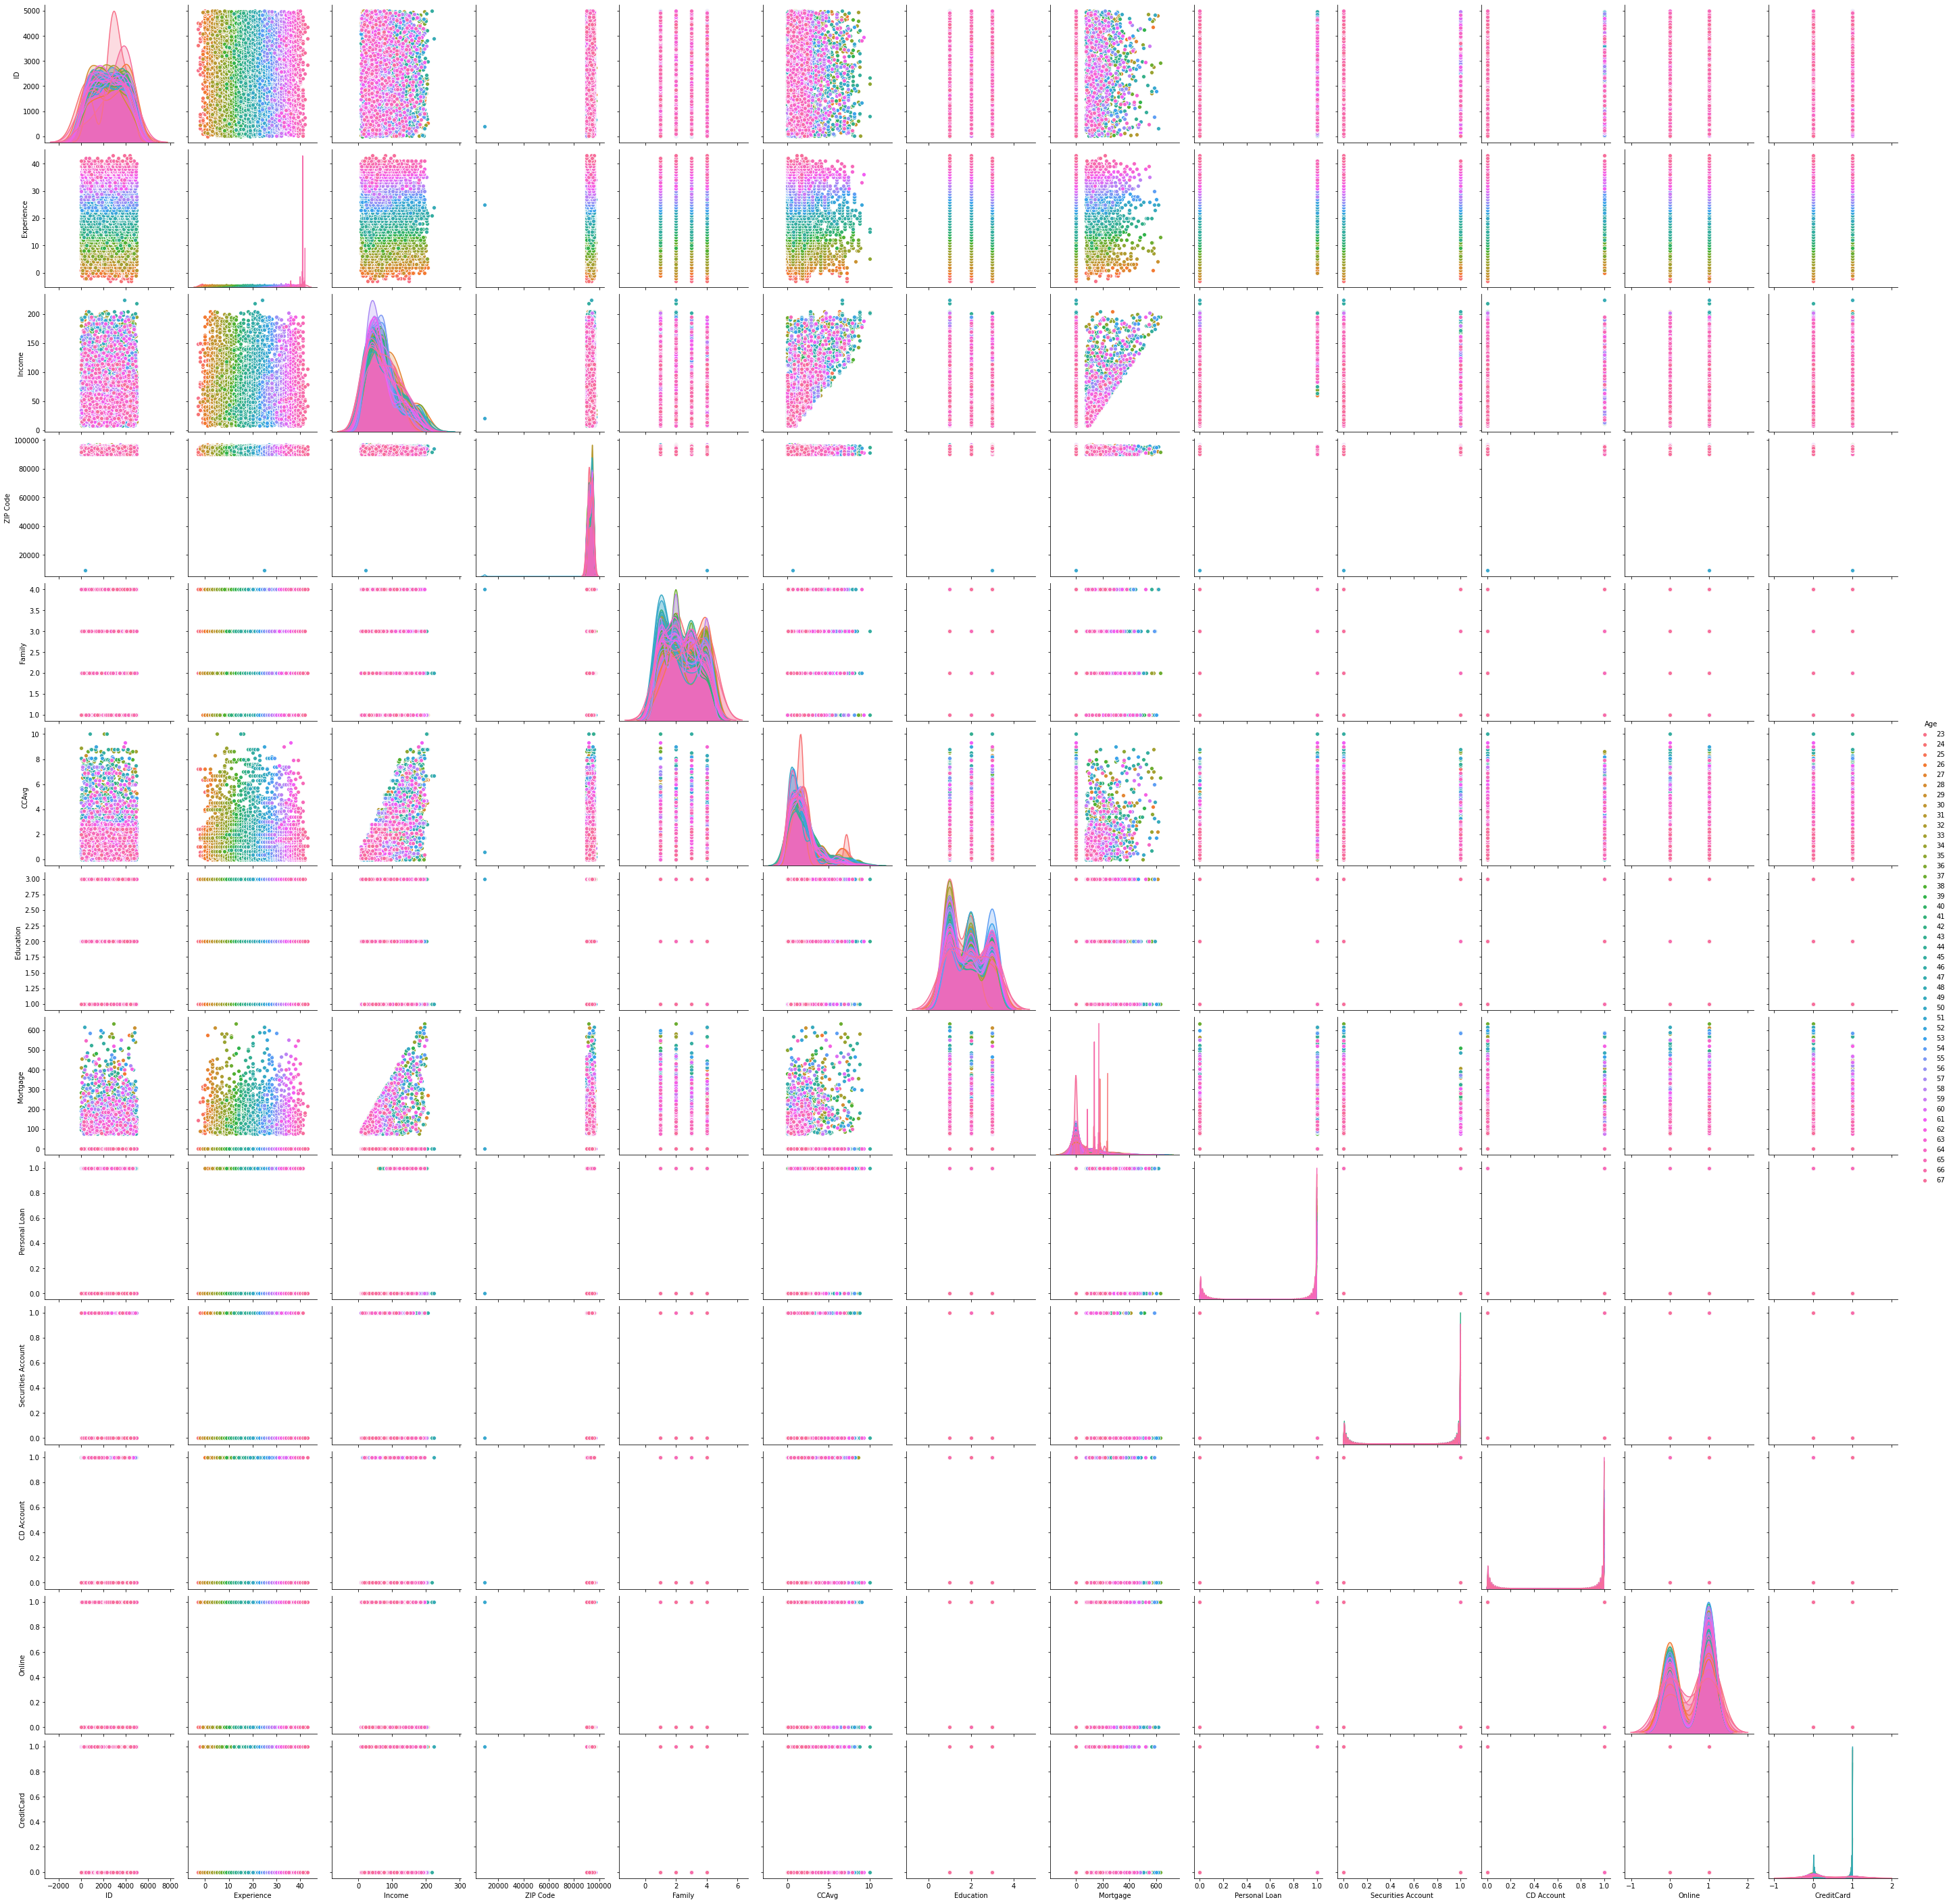

In [ ]:
sns.pairplot(Dataset)
plt.show()

# **Apply necessary transformations for the feature variables**

**To check how many user are buying personal loan**

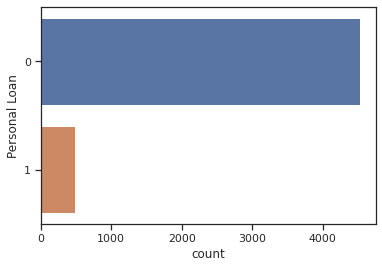

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='Personal Loan', data=Dataset)

In [ ]:
Dataset["Personal Loan"].value_counts().to_frame()

,Personal Loan
0,4520
1,480


From the above Picture, We can say that the data is imbalanced

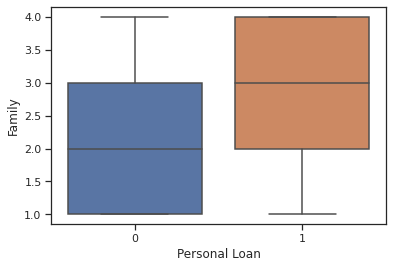

In [ ]:
sns.boxplot(x='Personal Loan',y='Family', data=Dataset)

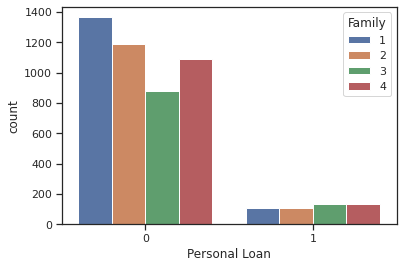

In [ ]:
sns.countplot(x='Personal Loan',hue='Family',data=Dataset)

Observation

The graph show persons who have personal loan have a higher credit card average.
 
It is clearly visible that as the members of family increases  the necessity of loan is also increasing.
 
It is very precise that as the income increases (approx 100K) the mortgage value also increases gradually wiht the necessity of personal loan.

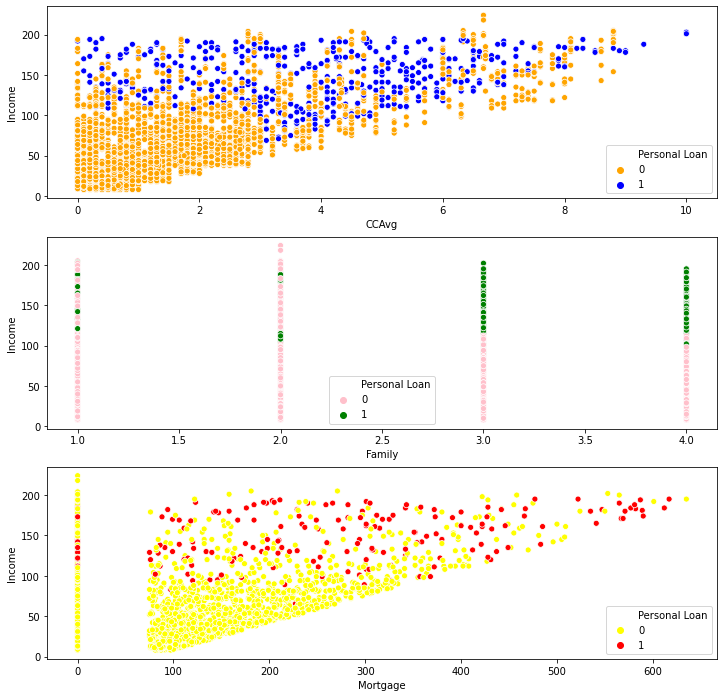

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
sns.scatterplot(Dataset.CCAvg, Dataset.Income, hue = Dataset['Personal Loan'], palette= ['orange','blue'])

plt.subplot(3,1,2)
sns.scatterplot(Dataset.Family, Dataset.Income, hue = Dataset['Personal Loan'], palette= ['pink','green'])

plt.subplot(3,1,3)
sns.scatterplot(Dataset.Mortgage, Dataset.Income, hue = Dataset['Personal Loan'], palette= ['yellow','red'])

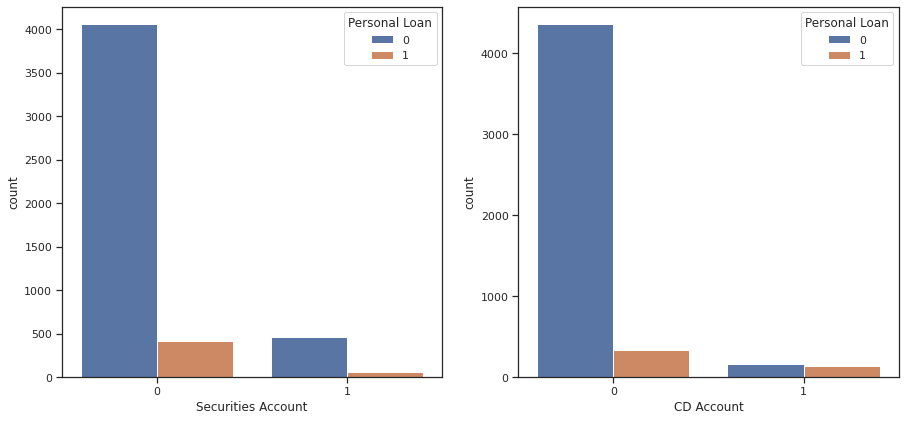

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Account security", data=Dataset ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=Dataset ,hue='Personal Loan')

Observation

Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well

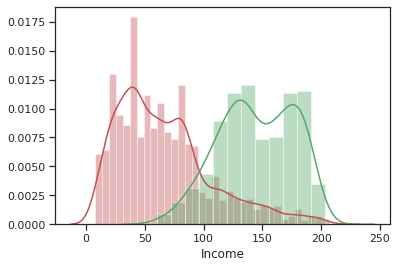

In [ ]:
sns.distplot(Dataset[Dataset["Personal Loan"] == 0]['Income'], color = 'r')
sns.distplot(Dataset[Dataset["Personal Loan"] == 1]['Income'], color = 'g')

Observation

The graph show those who have personal loan also have a higher income.

Observation

'Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute.
It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.

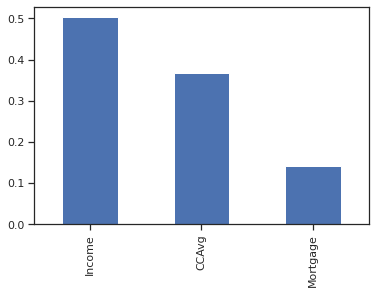

In [ ]:
Dataset[['Personal Loan', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

Observation

The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

# **Splitting into train and test data**

In [ ]:
X = Dataset.drop('Personal Loan',axis = 1).values
y = Dataset['Personal Loan'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [ ]:
X_train.shape

(3750, 10)

# **Logistic Regression**

In [ ]:
train_set, test_set = train_test_split(Dataset.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [ ]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [ ]:
train_set_indep = Dataset.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = Dataset["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Train**

In [ ]:
predict = logmodel.predict(X_train)
predictProb = logmodel.predict_proba(X_train)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_train, predict)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(Y_train,predict))

0.9410666666666667


In [ ]:
# Classification Report
print(classification_report(Y_train, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3404
           1       0.75      0.54      0.63       346

    accuracy                           0.94      3750
   macro avg       0.85      0.76      0.80      3750
weighted avg       0.94      0.94      0.94      3750



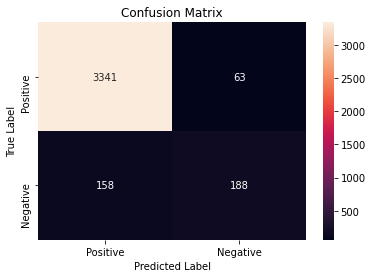

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_train, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Test**

In [ ]:
predict = logmodel.predict(X_test)
predictProb = logmodel.predict_proba(X_test)

In [ ]:
print(metrics.accuracy_score(Y_test,predict))

0.936


In [ ]:
# Classification Report
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1116
           1       0.79      0.55      0.65       134

    accuracy                           0.94      1250
   macro avg       0.87      0.77      0.81      1250
weighted avg       0.93      0.94      0.93      1250



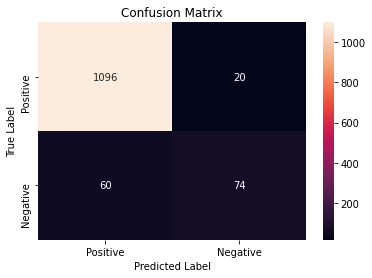

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Linear Regession**

In [ ]:
Dataset = pd.read_excel('Bank loan.xlsx',sheet_name='Data').values
x= Dataset[:,:-1]
y= Dataset[:,:-1]
x,y

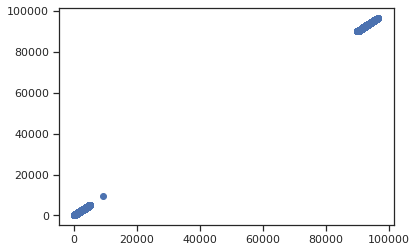

In [ ]:
plt.scatter(x, y)

In [ ]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
y_pred

array([[ 1.00000000e+00,  2.50000000e+01,  1.00000000e+00, ...,
         1.00000000e+00,  2.03753369e-15,  5.03725254e-16],
       [ 2.00000000e+00,  4.50000000e+01,  1.90000000e+01, ...,
         1.00000000e+00,  9.09232107e-16,  5.38205481e-16],
       [ 3.00000000e+00,  3.90000000e+01,  1.50000000e+01, ...,
         1.20737874e-16,  4.98927307e-15, -6.60461431e-16],
       ...,
       [ 4.99800000e+03,  6.30000000e+01,  3.90000000e+01, ...,
        -5.26985772e-16, -4.06318174e-15,  4.02584748e-17],
       [ 4.99900000e+03,  6.50000000e+01,  4.00000000e+01, ...,
         1.01146151e-16, -6.63241525e-15,  1.00000000e+00],
       [ 5.00000000e+03,  2.80000000e+01,  4.00000000e+00, ...,
         6.41622892e-16, -3.61691441e-15,  1.00000000e+00]])

In [ ]:
# Model
linearregression = LinearRegression()
model = linearregression.fit(X_train, Y_train)

prediction = model.predict(X_train)
model.score(X_train,Y_train)

0.37378100960195004

In [ ]:
# Model
linearregression = LinearRegression()
model = linearregression.fit(X_test, Y_test)

prediction = model.predict(X_test)
model.score(X_test,Y_test)

0.42581731384675303

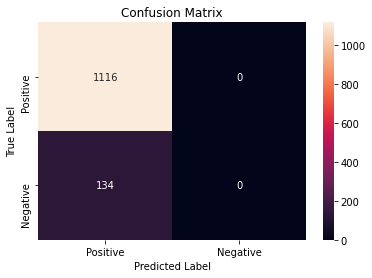

In [ ]:
# Confusion Matrix
cm1 = confusion_matrix(Y_test, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **KNN Algorithm**

In [ ]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [ ]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    # Predict the response
    Y_Pred = knn.predict(X_test)
    
    # Evaluate accuracy
    scores = accuracy_score(Y_test, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


In [ ]:
knn.fit(X_train, Y_train)    
predicted = knn.predict(X_train)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_train, predicted)
print(acc)


0.9077333333333333


In [ ]:
# Classification Report
print(classification_report(Y_train, predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3404
           1       0.00      0.00      0.00       346

    accuracy                           0.91      3750
   macro avg       0.45      0.50      0.48      3750
weighted avg       0.82      0.91      0.86      3750



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
knn.fit(X_train, Y_train)    
predicted = knn.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, predicted)
print(acc)



0.8928


In [ ]:
# Classification Report
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1116
           1       0.00      0.00      0.00       134

    accuracy                           0.89      1250
   macro avg       0.45      0.50      0.47      1250
weighted avg       0.80      0.89      0.84      1250



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Misclassification Error')

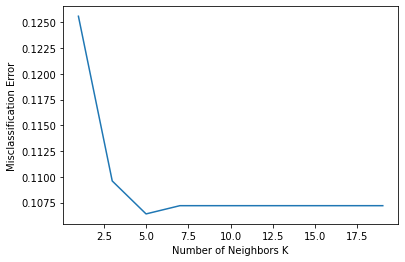

In [ ]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')



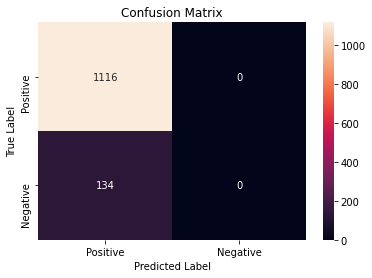

In [ ]:
# Confusion Matrix
cm1 = confusion_matrix(Y_test, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Naive Bayes**

In [ ]:
# Model
naive_model = GaussianNB()
naive_model.fit(X_train, Y_train)

prediction = naive_model.predict(X_train)
naive_model.score(X_train,Y_train)

0.8885333333333333

In [ ]:
# Classififcation Report
print(classification_report(Y_train, prediction))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3404
           1       0.42      0.58      0.49       346

    accuracy                           0.89      3750
   macro avg       0.69      0.75      0.71      3750
weighted avg       0.91      0.89      0.90      3750



In [ ]:
# Model
naive_model = GaussianNB()
naive_model.fit(X_train, Y_train)

prediction = naive_model.predict(X_test)
naive_model.score(X_test,Y_test)

0.8984

In [ ]:
# Classififcation Report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1116
           1       0.52      0.63      0.57       134

    accuracy                           0.90      1250
   macro avg       0.74      0.78      0.76      1250
weighted avg       0.91      0.90      0.90      1250



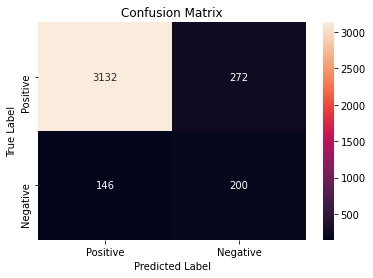

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(Y_train, prediction)
class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



# **Decision Tree**

In [ ]:
decisiontree = DecisionTreeClassifier()

In [ ]:
observation = [[5,4,3,2]]
model.predict(observation)
model.predict_proba(observation)

array([[0., 1., 0.]])

In [ ]:
# Model
decisiontree = DecisionTreeClassifier()
model = decisiontree.fit(X_train, Y_train)

prediction = model.predict(X_train)
model.score(X_train,Y_train)

1.0

In [ ]:
# Classififcation Report
print(classification_report(Y_train, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3404
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



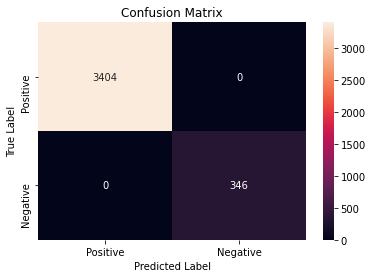

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(Y_train, prediction)
class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Model
decisiontree = DecisionTreeClassifier()
model = decisiontree.fit(X_train, Y_train)

prediction = model.predict(X_test)
model.score(X_test,Y_test)

0.9848

In [ ]:
# Classififcation Report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1116
           1       0.94      0.92      0.93       134

    accuracy                           0.98      1250
   macro avg       0.96      0.96      0.96      1250
weighted avg       0.98      0.98      0.98      1250



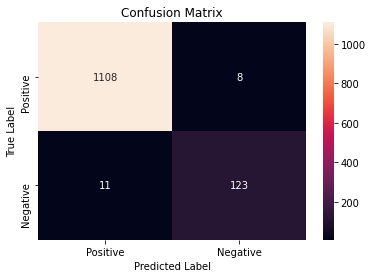

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(Y_test, prediction)
class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Random Forest**

In [ ]:
randomforest = RandomForestClassifier()

In [ ]:
# Model
randomforest = RandomForestClassifier()
model = randomforest.fit(X_test, Y_test)

prediction = model.predict(X_train)
model.score(X_train,Y_train)

0.9821333333333333

In [ ]:
# Classififcation Report
print(classification_report(Y_train, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3404
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



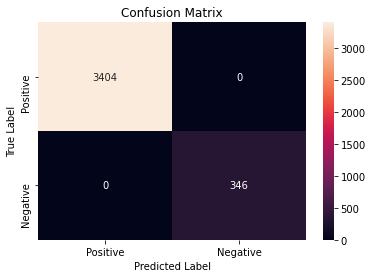

In [ ]:
# Confusion Matrix
cm3 = confusion_matrix(Y_train, prediction)
class_label = ["Positive", "Negative"]
df_cm3 = pd.DataFrame(cm3, index = class_label, columns = class_label)
sns.heatmap(df_cm3, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Model
randomforest = RandomForestClassifier()
model = randomforest.fit(X_test, Y_test)

prediction = model.predict(X_test)
model.score(X_test,Y_test)

1.0

In [ ]:
# Classififcation Report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1116
           1       0.99      0.90      0.94       134

    accuracy                           0.99      1250
   macro avg       0.99      0.95      0.97      1250
weighted avg       0.99      0.99      0.99      1250



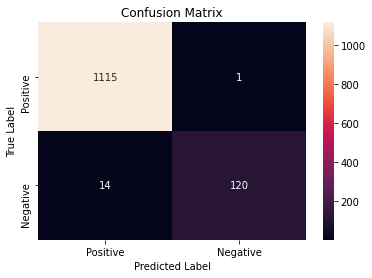

In [ ]:
# Confusion Matrix
cm3 = confusion_matrix(Y_test, prediction)
class_label = ["Positive", "Negative"]
df_cm3 = pd.DataFrame(cm3, index = class_label, columns = class_label)
sns.heatmap(df_cm3, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **SVM**

In [ ]:
svm = SVC()

In [ ]:
# Model
svm = SVC()
model = svm.fit(X_train, Y_train)

prediction = model.predict(X_train)
model.score(X_train,Y_train)

0.9077333333333333

In [ ]:
# Classififcation Report
print(classification_report(Y_train, prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3404
           1       0.00      0.00      0.00       346

    accuracy                           0.91      3750
   macro avg       0.45      0.50      0.48      3750
weighted avg       0.82      0.91      0.86      3750



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


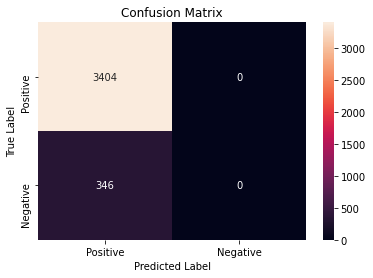

In [ ]:
# Confusion Matrix
cm4 = confusion_matrix(Y_train, prediction)
class_label = ["Positive", "Negative"]
df_cm4 = pd.DataFrame(cm4, index = class_label, columns = class_label)
sns.heatmap(df_cm4, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Model
svm = SVC()
model = svm.fit(X_test, Y_test)

prediction = model.predict(X_test)
model.score(X_test,Y_test)

0.8928

In [ ]:
# Classififcation Report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1116
           1       0.00      0.00      0.00       134

    accuracy                           0.89      1250
   macro avg       0.45      0.50      0.47      1250
weighted avg       0.80      0.89      0.84      1250



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


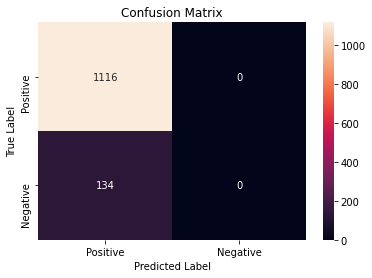

In [ ]:
# Confusion Matrix
cm4 = confusion_matrix(Y_test, prediction)
class_label = ["Positive", "Negative"]
df_cm4 = pd.DataFrame(cm4, index = class_label, columns = class_label)
sns.heatmap(df_cm4, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **AdaBoost**

In [ ]:
adaboost=AdaBoostClassifier()

In [ ]:
adaboost=AdaBoostClassifier()
model = adaboost.fit(X_train, Y_train)

prediction = model.predict(X_train)
model.score(X_train,Y_train)

0.9736

In [ ]:
# Classififcation Report
print(classification_report(Y_train, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3404
           1       0.90      0.80      0.85       346

    accuracy                           0.97      3750
   macro avg       0.94      0.89      0.92      3750
weighted avg       0.97      0.97      0.97      3750



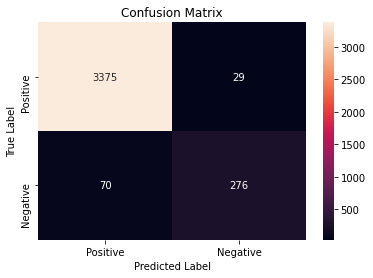

In [ ]:
# Confusion Matrix
cm5 = confusion_matrix(Y_train, prediction)
class_label = ["Positive", "Negative"]
df_cm5 = pd.DataFrame(cm5, index = class_label, columns = class_label)
sns.heatmap(df_cm5, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
adaboost=AdaBoostClassifier()
model = adaboost.fit(X_test, Y_test)

prediction = model.predict(X_test)
model.score(X_test,Y_test)

0.9848

In [ ]:
# Classififcation Report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1116
           1       0.96      0.90      0.93       134

    accuracy                           0.98      1250
   macro avg       0.97      0.95      0.96      1250
weighted avg       0.98      0.98      0.98      1250



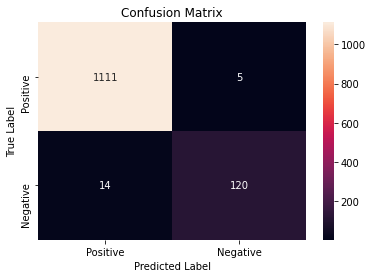

In [ ]:
# Confusion Matrix
cm6 = confusion_matrix(Y_test, prediction)
class_label = ["Positive", "Negative"]
df_cm6 = pd.DataFrame(cm6, index = class_label, columns = class_label)
sns.heatmap(df_cm6, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**violin plot:**

voilin plots also like box plots, but these give pdf along with box plots in it. they look a voilin

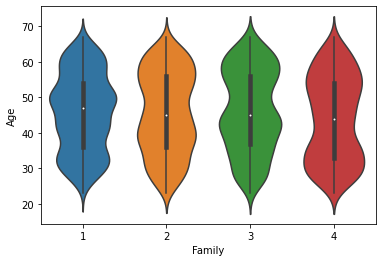

In [ ]:
sns.violinplot(x="Family",y="Age",data= Dataset,size='8')
plt.show()

**CDF(cummulative distributive function), PDF(probability denstiy funtion):**

pdf= [0.0524 0.0974 0.1264 0.0958 0.1064 0.12   0.1048 0.1356 0.1008 0.0604]
bin_edges=  [23.  27.4 31.8 36.2 40.6 45.  49.4 53.8 58.2 62.6 67. ]
cdf= [0.0524 0.1498 0.2762 0.372  0.4784 0.5984 0.7032 0.8388 0.9396 1.    ]


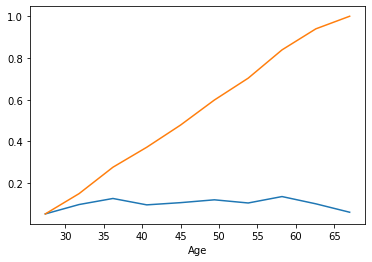

In [ ]:
count,bin_edges = np.histogram(Dataset['Age'],bins=10, density = True)
plt.xlabel('Age')
pdf = count/(sum(count))
print("pdf=",pdf);
print("bin_edges= ",bin_edges);
cdf = np.cumsum(pdf)
print("cdf=",cdf);
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);